In [1]:
file = "googleplaystore.csv"
reviews = "googleplaystore_user_reviews.csv"
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(file)

In [3]:
def clean_data(data):
    data['Installs'] = data['Installs'].str.replace('+','')
    data['Installs'] = data['Installs'].str.replace(',','')
    data['Type'] = data['Type'].str.replace('0','Free')
    data['Price'] = data['Price'].str.replace('$','')
    data['Size'] = data['Size'].str.replace('M','')
    data['Reviews'] = pd.to_numeric(data['Reviews'], errors= 'coerce')
    data['Size'] = pd.to_numeric(data['Size'], errors= 'coerce')
    data['Installs'] = pd.to_numeric(data['Installs'], errors= 'coerce')
    data['Price'] = pd.to_numeric(data['Price'], errors= 'coerce')
    return data

In [4]:
data = clean_data(data)


In [5]:
data.drop(10472, inplace = True)


/Users/omarkulov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/omarkulov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/omarkulov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/omarkulov/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


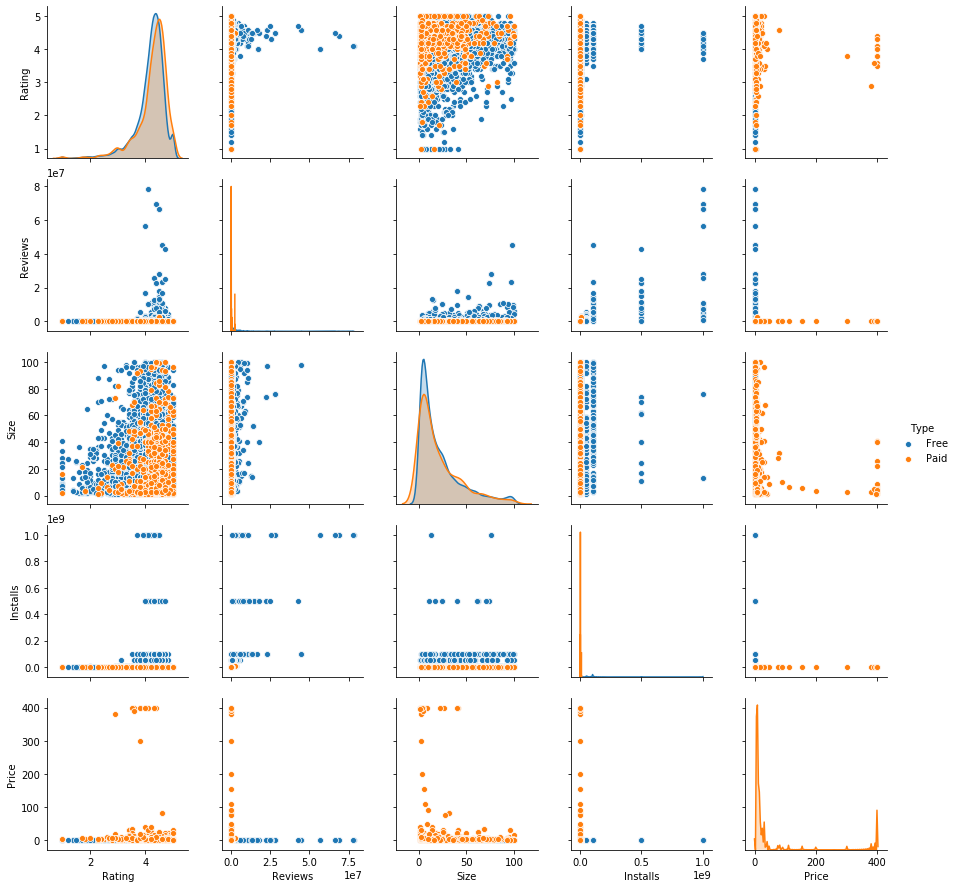

In [6]:
sns.pairplot(data, hue = 'Type')

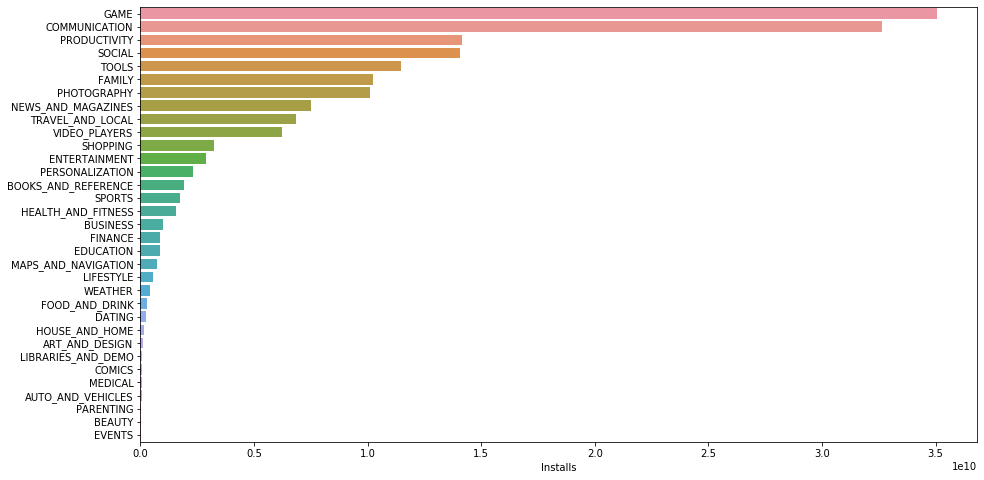

In [7]:
data_category = data.groupby('Category').sum()['Installs'].sort_values(ascending= False)
#(100. * data_category / data_category.sum()).round(0)
labels = data_category.index.values
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data_category, labels, ax= ax)

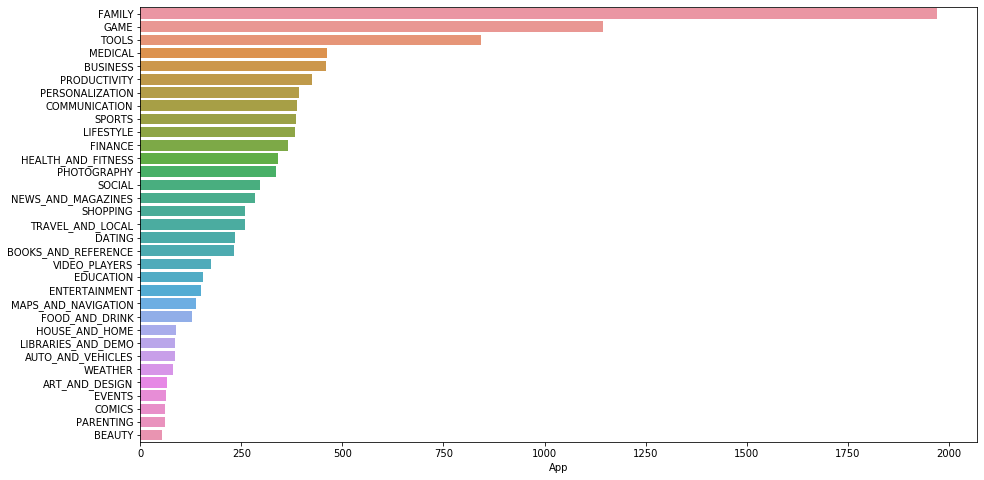

In [10]:
data["Market_Cap"] = data.Installs * data.Price
money = data.groupby('Category').count()["App"].sort_values(ascending= False)
labels = money.index.values
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(money, labels, ax= ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a229443d0>],
      dtype=object)

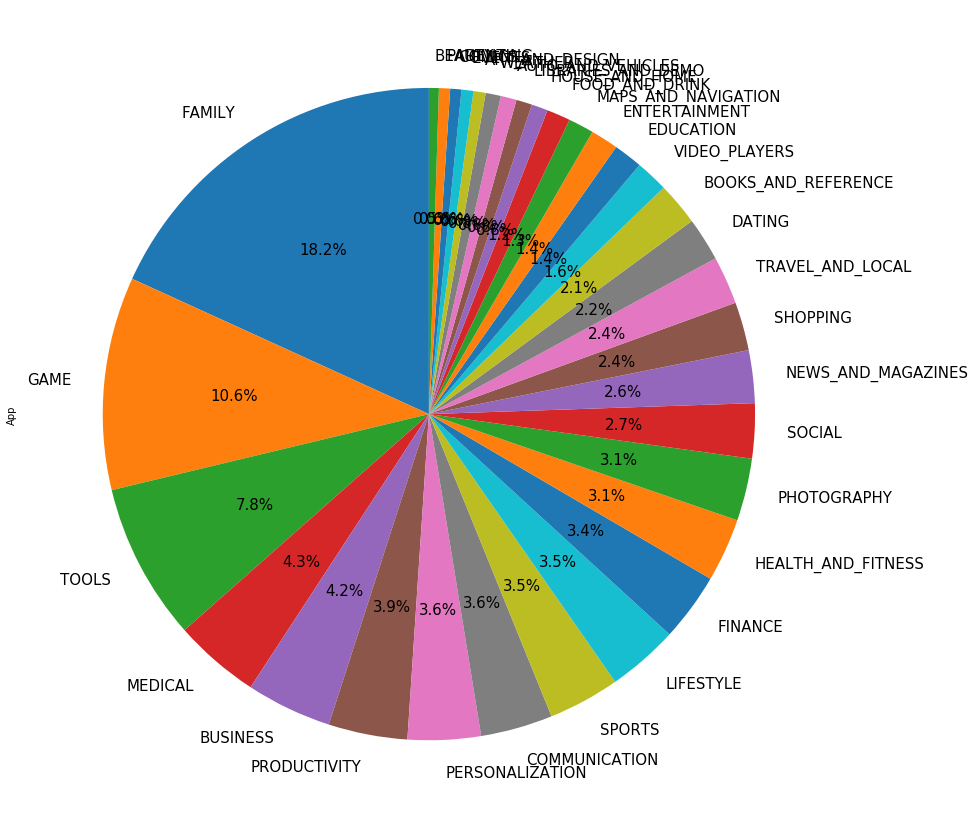

In [11]:
downloads = data.groupby('Category').count().App.sort_values(ascending= False)
labels = downloads.index.values
downloads.plot.pie( y = 'Category', subplots = True, autopct='%.1f%%', 
 startangle=90, shadow=False, labels=labels, legend = False, fontsize=15, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a33414fd0>],
      dtype=object)

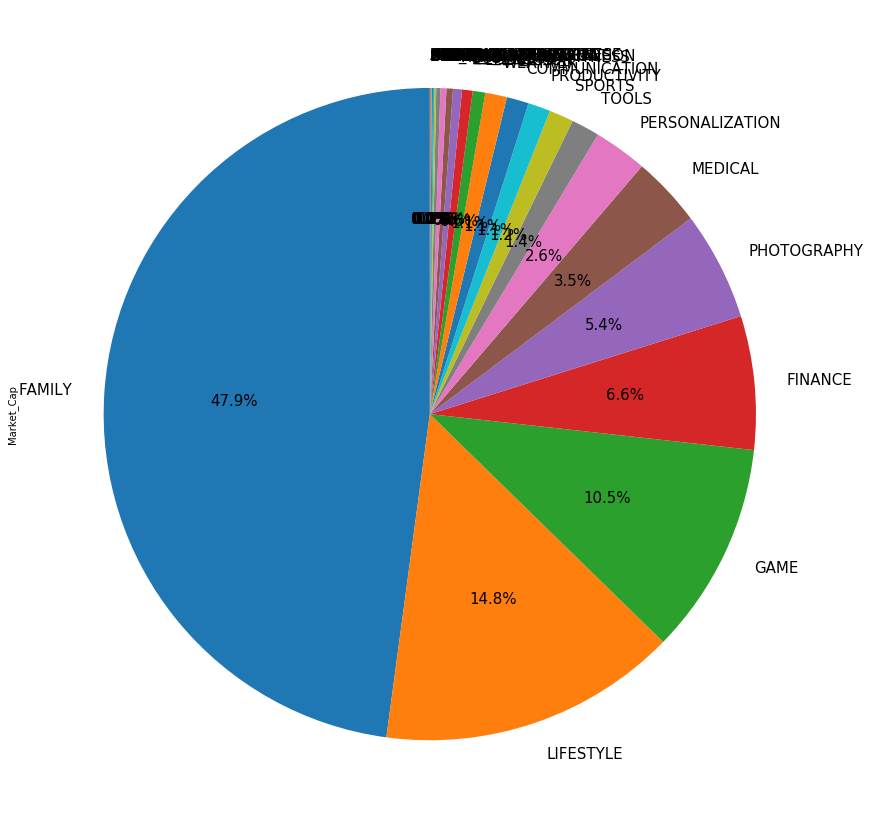

In [152]:
money = data.groupby('Category').sum().Market_Cap.sort_values(ascending= False)
labels = money.index.values
money.plot.pie( y = 'Category', subplots = True, autopct='%.1f%%', 
 startangle=90, shadow=False, labels=labels, legend = False, fontsize=15, figsize=(15,15))

In [158]:
data.groupby('Category').sum()

,Rating,Reviews,Size,Installs,Price,Market_Cap
Category,,,,,,
ART_AND_DESIGN,270.2,1.714440e+06,767.0,1.243381e+08,5.97,3.184000e+04
AUTO_AND_VEHICLES,305.9,1.163666e+06,1501.7,5.313021e+07,13.47,1.001485e+05
BEAUTY,179.7,3.962400e+05,648.4,2.719705e+07,0.00,0.000000e+00
BOOKS_AND_REFERENCE,773.6,2.195907e+07,2616.9,1.921470e+09,119.77,9.022674e+04
BUSINESS,1248.8,1.395455e+07,5784.0,1.001915e+09,185.27,2.048543e+06
COMICS,241.0,3.383276e+06,686.7,5.608615e+07,0.00,0.000000e+00
COMMUNICATION,1364.0,8.154623e+08,3106.5,3.264728e+10,83.14,4.247364e+06
DATING,774.3,7.291278e+06,3524.6,2.643108e+08,31.43,8.836150e+04
EDUCATION,680.3,3.959579e+07,2306.7,8.714520e+08,17.96,2.403980e+06


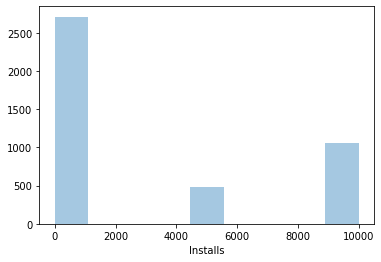

In [45]:
sns.distplot(data[data['Installs'] < 20000].Installs, kde = False, bins = 9)

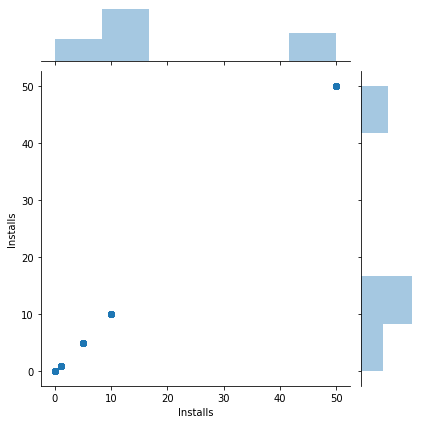

In [52]:
sns.jointplot(data= data[data['Installs']<100], x= 'Installs', y= 'Installs')

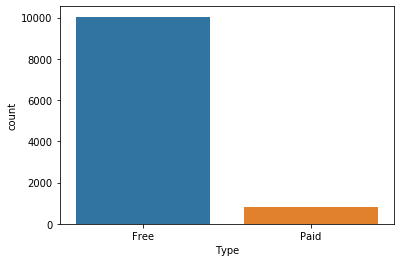

In [73]:
data_gr = data.groupby('Category').count()
sns.countplot(x = 'Type', data= data)

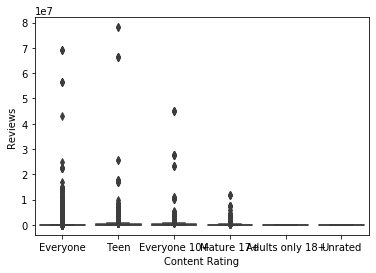

In [79]:
sns.boxplot(x='Content Rating',y= 'Reviews',data= data )

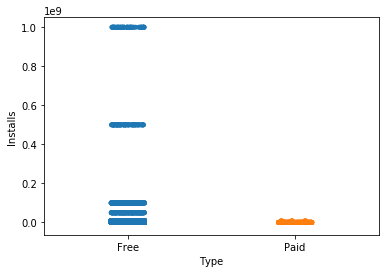

In [82]:
sns.stripplot(x= 'Type', y= 'Installs', data= data, jitter= True)

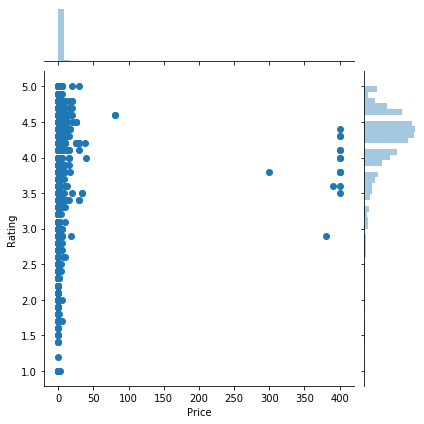

In [86]:
sns.jointplot(x='Price',y= 'Rating', data = data)

In [88]:
data['Market_Cap'].sum()

388629445.79